<a id="2"></a>
# <p style="padding:10px;background-color:white ;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries</p>

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from colorama import Back
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import os

<a id="2"></a>
# <p style="padding:10px;background-color:white ;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Data</p>

In [3]:
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
data = pd.read_csv(os.path.join(parent_directory, "data", "liver.csv"), encoding='utf-8')
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [4]:
print(data.shape)
data.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})


(30691, 11)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.000000,Female,0.700000,0.100000,187.000000,16.000000,18.000000,6.800000,3.300000,0.900000,1
1,62.000000,Male,10.900000,5.500000,699.000000,64.000000,100.000000,7.500000,3.200000,0.740000,1
2,62.000000,Male,7.300000,4.100000,490.000000,60.000000,68.000000,7.000000,3.300000,0.890000,1
3,58.000000,Male,1.000000,0.400000,182.000000,14.000000,20.000000,6.800000,3.400000,1.000000,1
4,72.000000,Male,3.900000,2.000000,195.000000,27.000000,59.000000,7.300000,2.400000,0.400000,1
5,46.000000,Male,1.800000,0.700000,208.000000,19.000000,14.000000,7.600000,4.400000,1.300000,1
6,26.000000,Female,0.900000,0.200000,154.000000,nan,12.000000,7.000000,3.500000,1.000000,1
7,29.000000,Female,0.900000,0.300000,202.000000,14.000000,11.000000,6.700000,3.600000,1.100000,1
8,17.000000,Male,0.900000,0.300000,202.000000,22.000000,19.000000,7.400000,4.100000,1.200000,2
9,55.000000,Male,0.700000,0.200000,290.000000,53.000000,58.000000,6.800000,3.400000,1.000000,1


In [5]:
def describe(df):

    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []


    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())

        if df[item].dtypes == 'float64' or df[item].dtypes == 'int64':
            min_.append(df[item].min())
            max_.append(df[item].max())
        else:
            min_.append('Str')
            max_.append('Str')


    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing,
        'Min': min_,
        'Max': max_
    })
    return output

describe(data)

,variable,dtype,count,unique,missing value,Min,Max
0,Age,float64,30691,78,2,4.0,90.0
1,Gender,object,30691,3,902,Str,Str
2,Total_Bilirubin,float64,30691,114,648,0.4,75.0
3,Direct_Bilirubin,float64,30691,81,561,0.1,19.7
4,Alkaline_Phosphotase,float64,30691,264,796,63.0,2110.0
5,Alamine_Aminotransferase,float64,30691,153,538,10.0,2000.0
6,Aspartate_Aminotransferase,float64,30691,178,462,10.0,4929.0
7,Total_Protiens,float64,30691,59,463,2.7,9.6
8,Albumin,float64,30691,41,494,0.9,5.5
9,Albumin_and_Globulin_Ratio,float64,30691,70,559,0.3,2.8


In [8]:
Styles = [dict(selector = "caption",
               props = [("color", "white"),
                        ("text-align", "center"),
                       ('font-size', '15pt'),

                       ('background-color', '#E72B3B')])]
desc_df = describe(data)
desc_df = desc_df.style.set_caption('Overview of the dataset').set_table_styles(Styles)
desc_df.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

,variable,dtype,count,unique,missing value,Min,Max
0,Age,float64,30691,78,2,4.000000,90.000000
1,Gender,object,30691,3,902,Str,Str
2,Total_Bilirubin,float64,30691,114,648,0.400000,75.000000
3,Direct_Bilirubin,float64,30691,81,561,0.100000,19.700000
4,Alkaline_Phosphotase,float64,30691,264,796,63.000000,2110.000000
5,Alamine_Aminotransferase,float64,30691,153,538,10.000000,2000.000000
6,Aspartate_Aminotransferase,float64,30691,178,462,10.000000,4929.000000
7,Total_Protiens,float64,30691,59,463,2.700000,9.600000
8,Albumin,float64,30691,41,494,0.900000,5.500000
9,Albumin_and_Globulin_Ratio,float64,30691,70,559,0.300000,2.800000


The column ** Albumin_and_Globulin_Ratio ** doesnot have 583 values so we need to correct this in the data preprocessing stage. Now i would like to check if the data is balanced or not by plotting a histogram

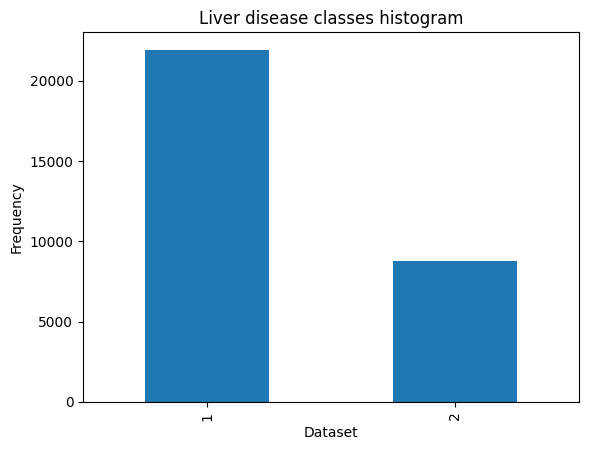

In [5]:

count_classes = data['Dataset'].value_counts().sort_index()
count_classes.plot(kind='bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")
plt.show()


Have to remap the class labels for convenience,  no liver disease then:=0 for patients having liver disease then:=1

In [6]:
data['Dataset'] = data['Dataset'].map({2:0,1:1})
y = data['Dataset']

** Check from the website: 416 liver disease patients and 167 normal patients**

In [7]:
data['Dataset'].value_counts()

Dataset
1    21917
0     8774
Name: count, dtype: int64

Now I filled in the missing values with zeros

In [8]:
data.isna().sum()

Age                             2
Gender                        902
Total_Bilirubin               648
Direct_Bilirubin              561
Alkaline_Phosphotase          796
Alamine_Aminotransferase      538
Aspartate_Aminotransferase    462
Total_Protiens                463
Albumin                       494
Albumin_and_Globulin_Ratio    559
Dataset                         0
dtype: int64

In [9]:
data=data.fillna(method='bfill')
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [10]:
data_features=data.drop(['Dataset'],axis=1)
data_num_features=data.drop(['Gender','Dataset'],axis=1)
data_num_features.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40


In [11]:
data_num_features.describe() # check to whether feature scaling has to be performed or not

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,30691.000000,30691.000000,30691.000000,30691.000000,30691.000000,30691.000000,30691.000000,30691.000000,30691.000000
mean,44.108371,3.377798,1.522430,288.244567,81.329445,111.202665,6.480287,3.133143,0.945434
std,15.981175,6.325655,2.865207,237.205199,181.760767,279.386802,1.082810,0.793625,0.323664
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000
75%,55.000000,2.700000,1.300000,298.000000,61.000000,88.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


** From the table above as the ranges are different for different features, feature scaling has to be performed **

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(data_num_features.columns)
data_features_scaled=pd.DataFrame(data=data_features)
data_features_scaled[cols]=scaler.fit_transform(data_features[cols])
data_features_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.307286,Female,-0.423330,-0.496457,-0.426830,-0.359431,-0.333603,0.295267,0.210250,-0.140377
1,1.119562,Male,1.189177,1.388254,1.731674,-0.095344,-0.040098,0.941743,0.084244,-0.634725
2,1.119562,Male,0.620057,0.899625,0.850566,-0.117351,-0.154636,0.479974,0.210250,-0.171274
3,0.869264,Male,-0.375904,-0.391751,-0.447909,-0.370435,-0.326444,0.295267,0.336256,0.168591
4,1.745309,Male,0.082554,0.166682,-0.393103,-0.298911,-0.186850,0.757036,-0.923806,-1.685215


Now the categorical data has to be encoded to numerical values, here as it is one column which has to be encoded i just used the conventional pandas **get_dummies** function

In [13]:
data_exp=pd.get_dummies(data_features_scaled)
data_exp.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,1.307286,-0.423330,-0.496457,-0.426830,-0.359431,-0.333603,0.295267,0.210250,-0.140377,True,False
1,1.119562,1.189177,1.388254,1.731674,-0.095344,-0.040098,0.941743,0.084244,-0.634725,False,True
2,1.119562,0.620057,0.899625,0.850566,-0.117351,-0.154636,0.479974,0.210250,-0.171274,False,True
3,0.869264,-0.375904,-0.391751,-0.447909,-0.370435,-0.326444,0.295267,0.336256,0.168591,False,True
4,1.745309,0.082554,0.166682,-0.393103,-0.298911,-0.186850,0.757036,-0.923806,-1.685215,False,True


** To look at the correlations between the features heatmap with corr() function is helpful **

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,-0.003054,-0.003447,-0.001864,-0.000459,0.004918,-0.008016,-0.015911,-0.018718
Total_Bilirubin,-0.003054,1.000000,0.859588,0.191325,0.199748,0.234812,0.002345,-0.213105,-0.192586
Direct_Bilirubin,-0.003447,0.859588,1.000000,0.220496,0.220992,0.254345,0.005794,-0.223538,-0.188388
Alkaline_Phosphotase,-0.001864,0.191325,0.220496,1.000000,0.122330,0.158231,-0.025463,-0.160015,-0.226287
Alamine_Aminotransferase,-0.000459,0.199748,0.220992,0.122330,1.000000,0.774636,-0.040202,-0.028128,-0.005663
Aspartate_Aminotransferase,0.004918,0.234812,0.254345,0.158231,0.774636,1.000000,-0.025315,-0.083970,-0.067358
Total_Protiens,-0.008016,0.002345,0.005794,-0.025463,-0.040202,-0.025315,1.000000,0.759719,0.220696
Albumin,-0.015911,-0.213105,-0.223538,-0.160015,-0.028128,-0.083970,0.759719,1.000000,0.670556
Albumin_and_Globulin_Ratio,-0.018718,-0.192586,-0.188388,-0.226287,-0.005663,-0.067358,0.220696,0.670556,1.000000


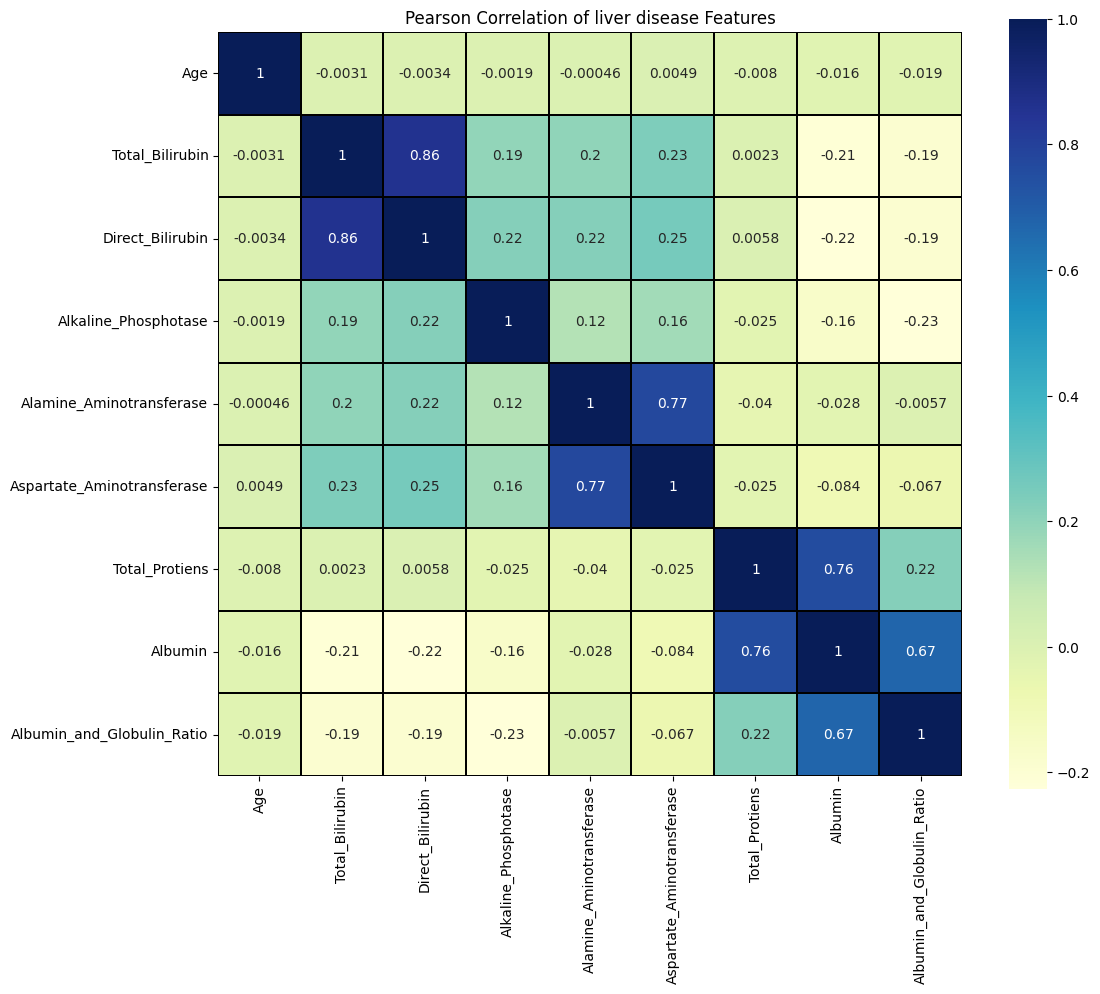

In [14]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of liver disease Features')
sns.heatmap(data_num_features.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)
data_num_features.astype(float).corr()

In [15]:
features_to_merge = ['Direct_Bilirubin', 'Aspartate_Aminotransferase']
df_merged = data_exp.drop(features_to_merge, axis=1)
df_merged['Merged_Feature'] = data_exp[features_to_merge].mean(axis=1)
df_merged

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Merged_Feature
0,1.307286,-0.423330,-0.426830,-0.359431,0.295267,0.210250,-0.140377,True,False,-0.415030
1,1.119562,1.189177,1.731674,-0.095344,0.941743,0.084244,-0.634725,False,True,0.674078
2,1.119562,0.620057,0.850566,-0.117351,0.479974,0.210250,-0.171274,False,True,0.372494
3,0.869264,-0.375904,-0.447909,-0.370435,0.295267,0.336256,0.168591,False,True,-0.359098
4,1.745309,0.082554,-0.393103,-0.298911,0.757036,-0.923806,-1.685215,False,True,-0.010084
...,...,...,...,...,...,...,...,...,...,...
30686,0.368667,-0.186197,1.356466,-0.353929,0.757036,-0.671794,-1.221764,False,True,-0.240074
30687,0.681540,-0.075535,0.816840,-0.326420,0.479974,-0.923806,-1.376247,False,True,-0.176983
30688,0.618965,0.541012,1.069789,0.190751,-0.074148,-0.041763,-0.140377,False,True,0.176954
30689,0.243517,-0.233624,-0.241333,-0.359431,-2.013578,-1.931856,-1.067280,True,False,-0.191753


In [16]:
df_merged.drop('Alamine_Aminotransferase', axis=1, inplace=True)
df_merged

,Age,Total_Bilirubin,Alkaline_Phosphotase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Merged_Feature
0,1.307286,-0.423330,-0.426830,0.295267,0.210250,-0.140377,True,False,-0.415030
1,1.119562,1.189177,1.731674,0.941743,0.084244,-0.634725,False,True,0.674078
2,1.119562,0.620057,0.850566,0.479974,0.210250,-0.171274,False,True,0.372494
3,0.869264,-0.375904,-0.447909,0.295267,0.336256,0.168591,False,True,-0.359098
4,1.745309,0.082554,-0.393103,0.757036,-0.923806,-1.685215,False,True,-0.010084
...,...,...,...,...,...,...,...,...,...
30686,0.368667,-0.186197,1.356466,0.757036,-0.671794,-1.221764,False,True,-0.240074
30687,0.681540,-0.075535,0.816840,0.479974,-0.923806,-1.376247,False,True,-0.176983
30688,0.618965,0.541012,1.069789,-0.074148,-0.041763,-0.140377,False,True,0.176954
30689,0.243517,-0.233624,-0.241333,-2.013578,-1.931856,-1.067280,True,False,-0.191753


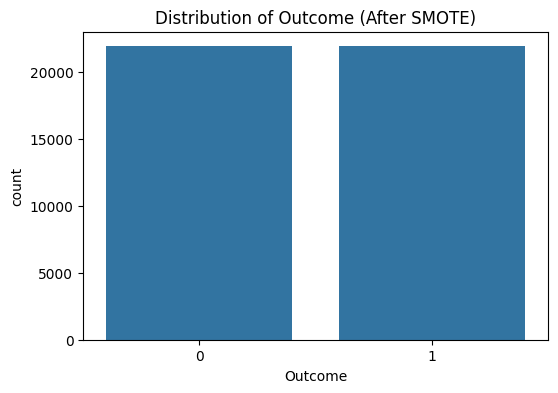

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_merged, y)


df_merged = pd.concat([pd.DataFrame(X_resampled, columns=df_merged.columns), pd.Series(y_resampled, name='Outcome')], axis=1)


plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_merged)
plt.title('Distribution of Outcome (After SMOTE)')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=40)

In [19]:
# training_acc_1 = []
# test_acc_1 = []

# range_k = range(2,20)

# for number_k in range_k:
#     knn = KNeighborsClassifier(n_neighbors = number_k, p=1)
#     knn.fit (X_train, y_train.ravel())
#     training_acc_1.append(knn.score(X_train,y_train))
#     test_acc_1.append(knn.score(X_test, y_test))


# plt.figure(figsize=(15,5), dpi=200)
# plt.plot(range_k, training_acc_1, label='Acc of training', color= 'black')
# plt.plot(range_k, test_acc_1, label='Acc of test set', color= '#E72B3B')
# plt.ylabel('Acc')
# plt.xlabel('Number of Neighbors')
# plt.title('Acc - Number of K')
# plt.legend()
# plt.xticks(range(1,20))
# plt.axvline(x = 3, linestyle= 'dotted', c= 'black')
# plt.show()

In [20]:
K = 3
model1 = KNeighborsClassifier(K, p=1)
model1.fit(X_train, y_train.ravel())
y_pred_1 = model1.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_1))
Best_knn = metrics.accuracy_score(y_test,y_pred_1)

Accuracy 0.9720542945135165


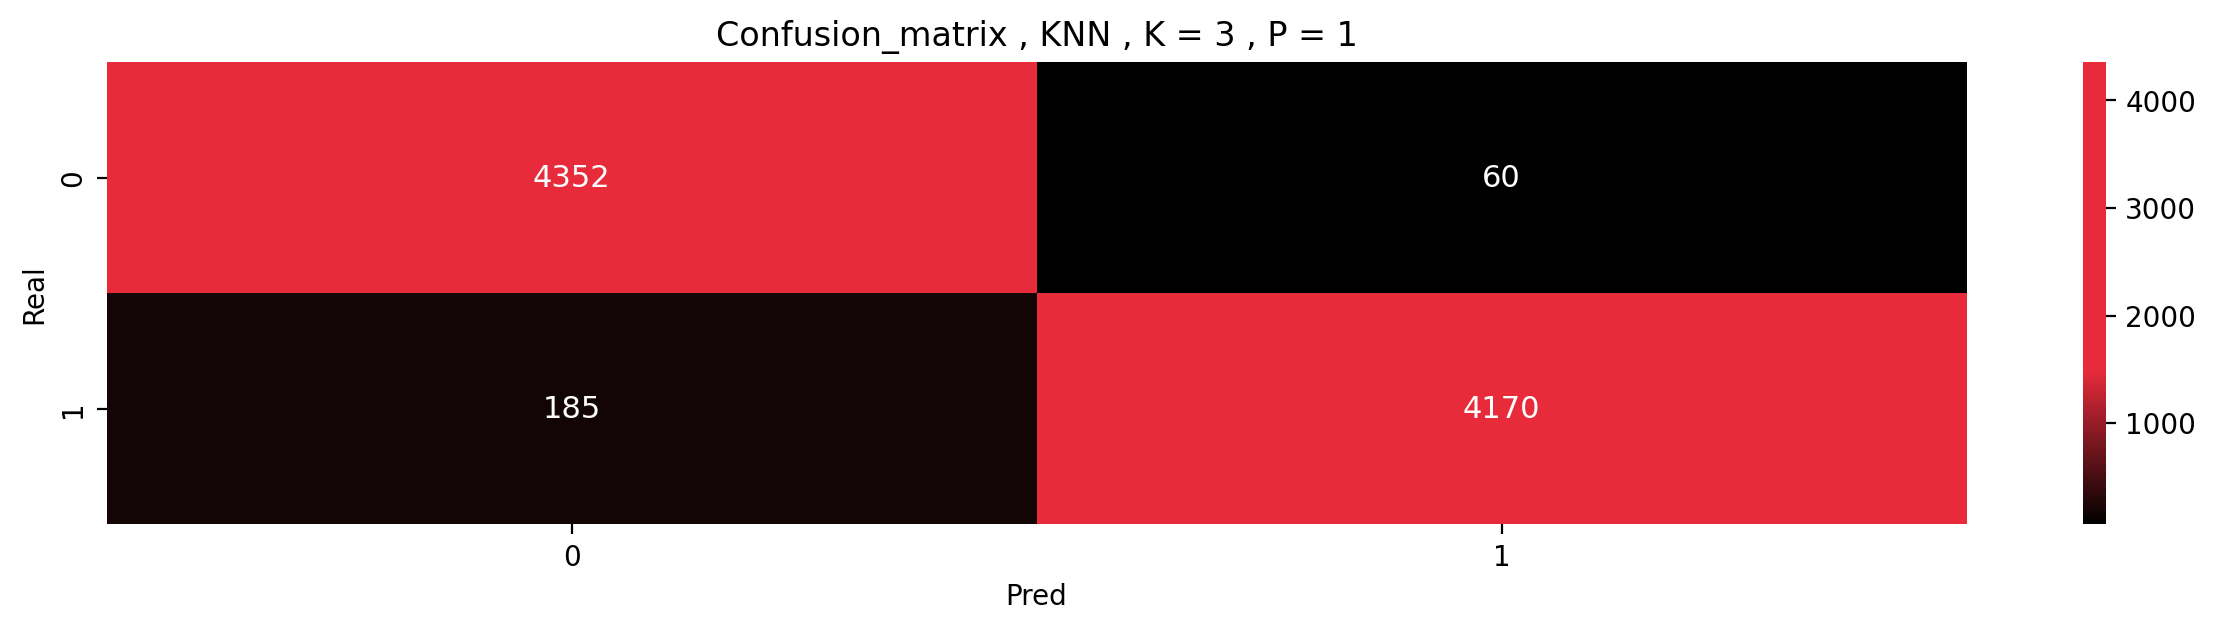

In [21]:
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix , KNN , K = 3 , P = 1")
annot = np.array([[f"{conf_matrix_1[0, 0]}", f"{conf_matrix_1[0, 1]}"],
                  [f"{conf_matrix_1[1, 0]}", f"{conf_matrix_1[1, 1]}"]], dtype=object)


sns.heatmap(conf_matrix_1,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [22]:
# training_acc_2 = []
# test_acc_2 = []

# range_k = range(2,20)

# for number_k in range_k:
#     knn = KNeighborsClassifier(n_neighbors = number_k, p=2)
#     knn.fit (X_train, y_train.ravel())
#     training_acc_2.append(knn.score(X_train,y_train))
#     test_acc_2.append(knn.score(X_test, y_test))


# plt.figure(figsize=(15,5), dpi=200)
# plt.plot(range_k, training_acc_2, label='Acc of training', color= 'black')
# plt.plot(range_k, test_acc_2, label='Acc of test set', color= '#E72B3B')
# plt.ylabel('Acc')
# plt.xlabel('Number of Neighbors')
# plt.title('Acc - Number of K')
# plt.legend()
# plt.xticks(range(1,20))
# plt.axvline(x = 3, linestyle= 'dotted', c= 'black')
# plt.show()

In [23]:
K = 3
model2 = KNeighborsClassifier(K, p=2)
model2.fit(X_train, y_train.ravel())
y_pred_2 = model2.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_2))

Accuracy 0.9522071404129121


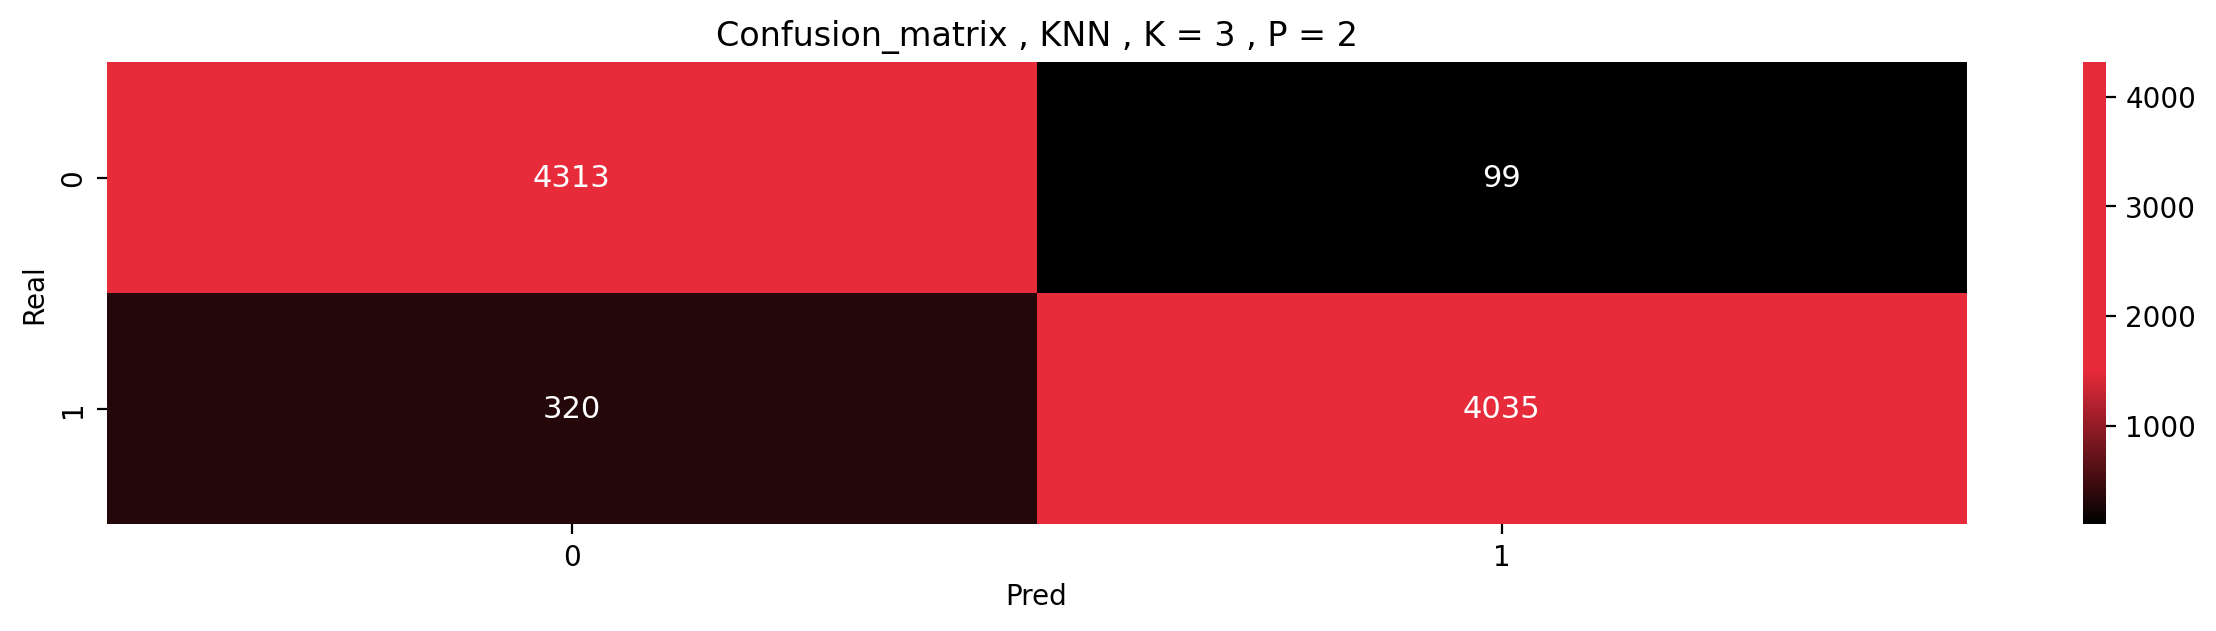

In [24]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix , KNN , K = 3 , P = 2")
annot = np.array([[f"{conf_matrix_2[0, 0]}", f"{conf_matrix_2[0, 1]}"],
                  [f"{conf_matrix_2[1, 0]}", f"{conf_matrix_2[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_2,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [25]:
class color:
    BOLD = '\033[1m'
    END = '\033[0m'

In [26]:
print(Back.RED +color.BOLD+ "Classification report for model1 (K= 3 and p = 1):"+ Back.RESET+ color.END)
print(classification_report(y_train, model1.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for model2 (K= 3 and p = 2):"+ Back.RESET+ color.END)
print(classification_report(y_train, model2.predict(X_train)))

Classification report for model1 (K= 3 and p = 1):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17505
           1       1.00      0.99      0.99     17562

    accuracy                           0.99     35067
   macro avg       0.99      0.99      0.99     35067
weighted avg       0.99      0.99      0.99     35067

Classification report for model2 (K= 3 and p = 2):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17505
           1       0.99      0.97      0.98     17562

    accuracy                           0.98     35067
   macro avg       0.98      0.98      0.98     35067
weighted avg       0.98      0.98      0.98     35067



In [27]:
model3 = SVC(C= 3, kernel= 'linear')
model3.fit(X_train, y_train)
y_pred_3 = model3.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_3))
Best_SVM = metrics.accuracy_score(y_test,y_pred_3)

Accuracy 0.7019504961788525


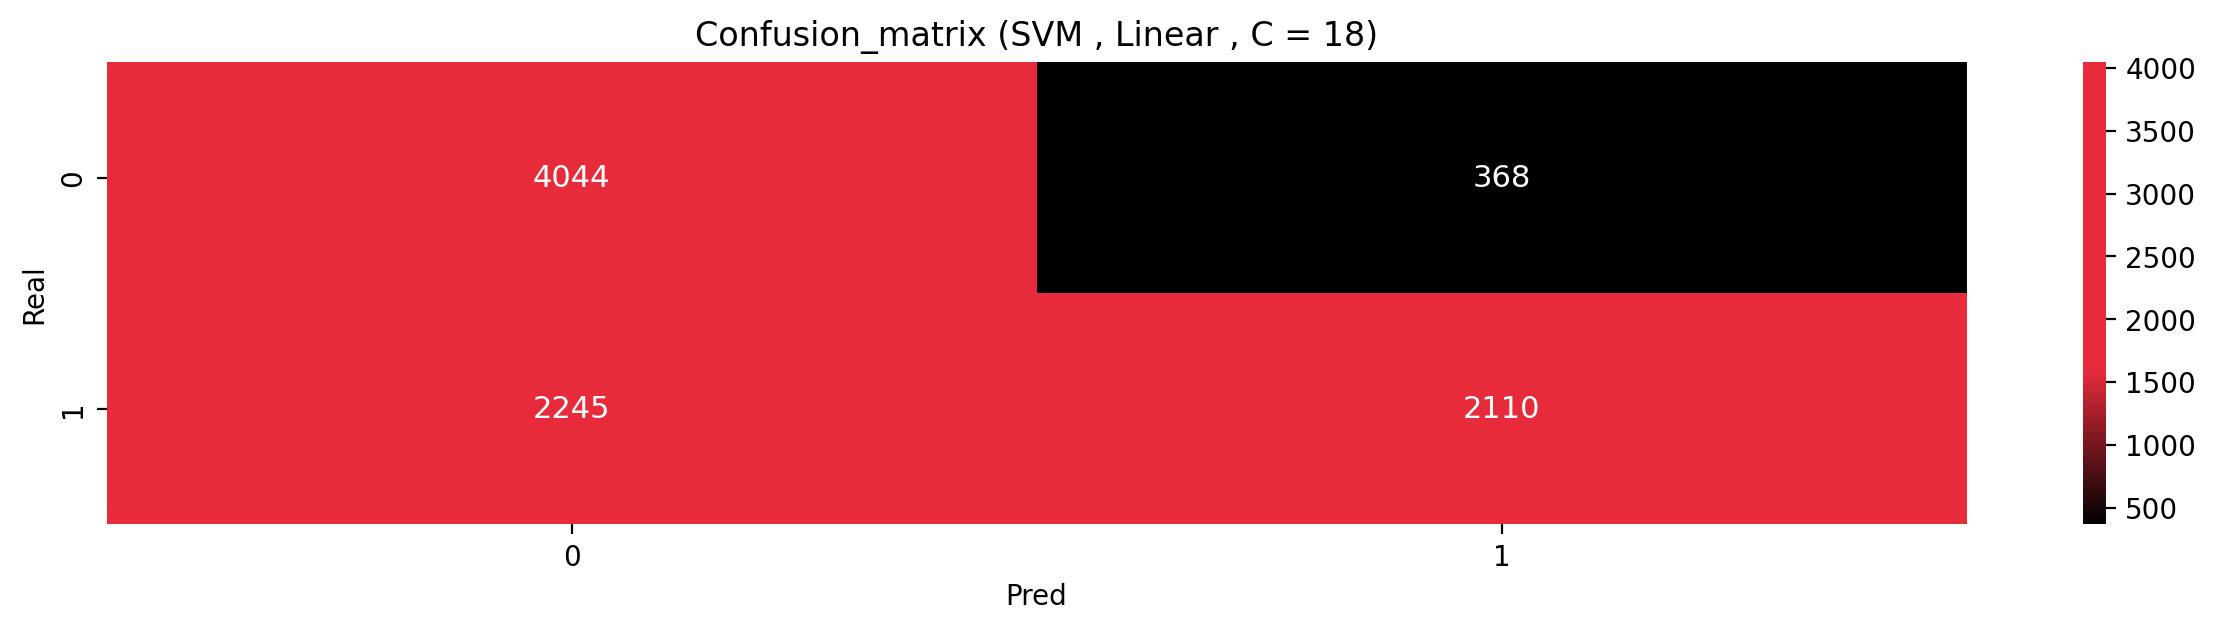

In [28]:
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Linear , C = 18)")
annot = np.array([[f"{conf_matrix_3[0, 0]}", f"{conf_matrix_3[0, 1]}"],
                  [f"{conf_matrix_3[1, 0]}", f"{conf_matrix_3[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_3,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()


In [29]:
# training_acc_4 = []
# test_acc_4 = []

# C = [1,2,4,6,8,10]

# for C_ in C:
#     SVM = SVC(C= C_, kernel= 'poly')
#     SVM.fit (X_train, y_train.ravel())
#     training_acc_4.append(SVM.score(X_train,y_train))
#     test_acc_4.append(SVM.score(X_test, y_test))


# plt.figure(figsize=(15,5), dpi=200)
# plt.plot(C, training_acc_4, label='Acc of training', color= 'black')
# plt.plot(C, test_acc_4, label='Acc of test set', color= '#E72B3B')
# plt.ylabel('Acc')
# plt.xlabel('Number of C ')
# plt.title('Acc - Number of C - Poly')
# plt.legend()
# plt.xticks(range(0,50))
# plt.axvline(x = 2, linestyle= 'dotted', c= 'black')
# plt.show()

In [30]:
model4 = SVC(C= 3, kernel= 'poly')
model4.fit(X_train, y_train)
y_pred_4 = model4.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_4))

Accuracy 0.7376525607391354


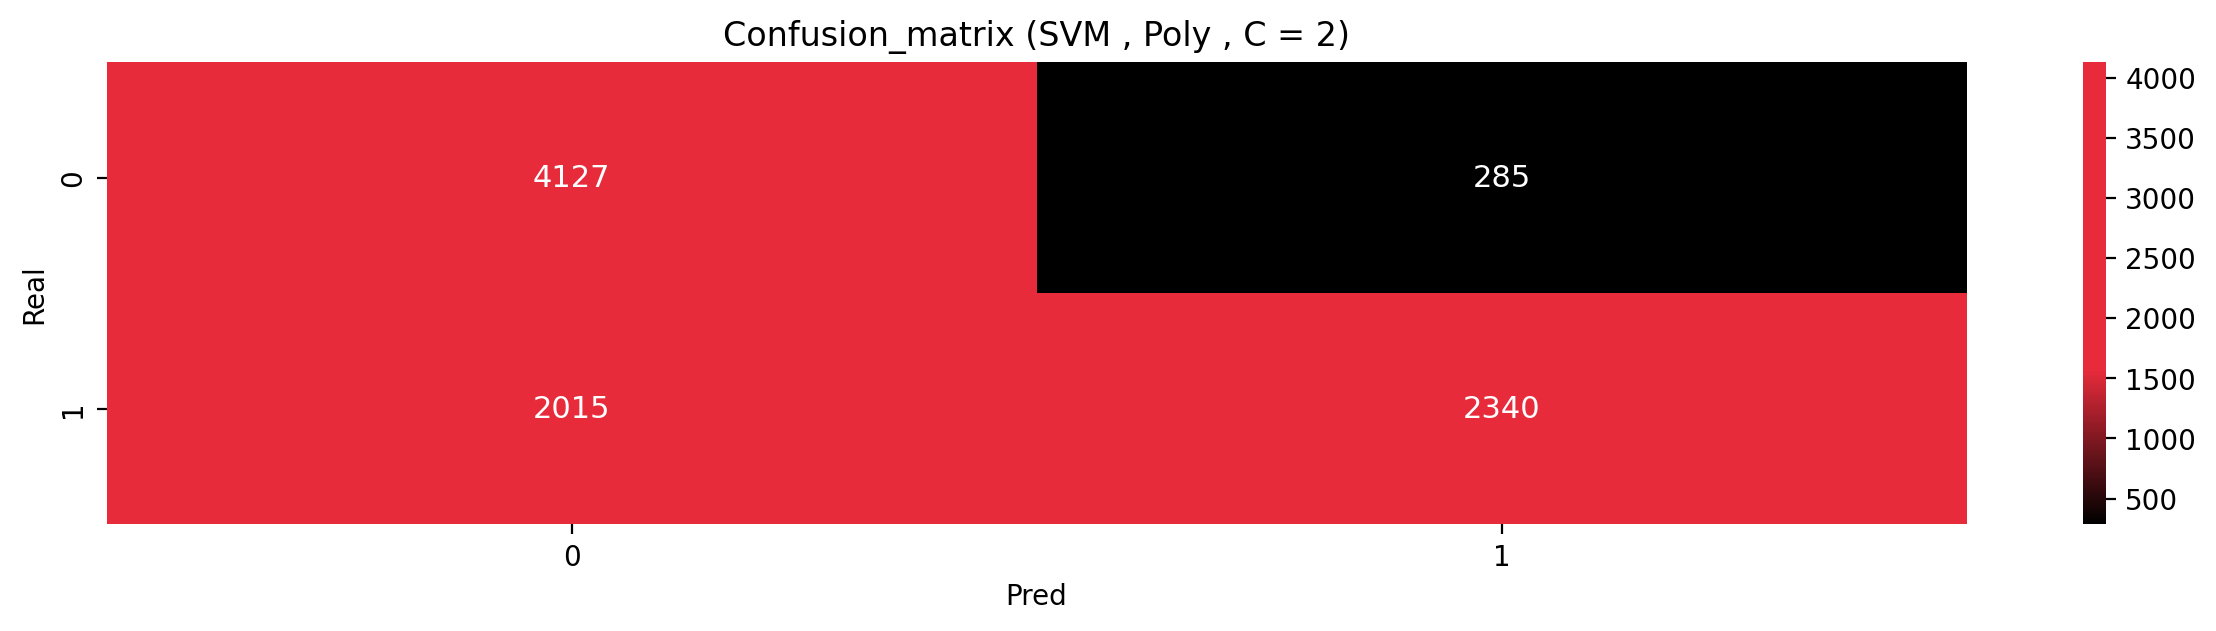

In [31]:
conf_matrix_4 = confusion_matrix(y_test, y_pred_4)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Poly , C = 2)")
annot = np.array([[f"{conf_matrix_4[0, 0]}", f"{conf_matrix_4[0, 1]}"],
                  [f"{conf_matrix_4[1, 0]}", f"{conf_matrix_4[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_4,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [32]:
print(Back.RED +color.BOLD+ "Classification report for model3 (Svm, kernel = Linear, C = 20):"+ Back.RESET+ color.END)
print(classification_report(y_train, model3.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for model4 (Svm, kernel = Poly, C = 2):"+ Back.RESET+ color.END)
print(classification_report(y_train, model4.predict(X_train)))

Classification report for model3 (Svm, kernel = Linear, C = 20):
              precision    recall  f1-score   support

           0       0.64      0.92      0.75     17505
           1       0.85      0.48      0.62     17562

    accuracy                           0.70     35067
   macro avg       0.75      0.70      0.69     35067
weighted avg       0.75      0.70      0.69     35067

Classification report for model4 (Svm, kernel = Poly, C = 2):
              precision    recall  f1-score   support

           0       0.67      0.93      0.78     17505
           1       0.89      0.54      0.67     17562

    accuracy                           0.74     35067
   macro avg       0.78      0.74      0.73     35067
weighted avg       0.78      0.74      0.73     35067



In [42]:
model7 = RandomForestClassifier(max_depth = 13, criterion= 'gini', random_state=40, n_estimators= 16)
model7.fit(X_train, y_train.ravel())
y_pred_7 = model7.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_7))
Best_RF = metrics.accuracy_score(y_test,y_pred_7)

Accuracy 0.9851716664765598


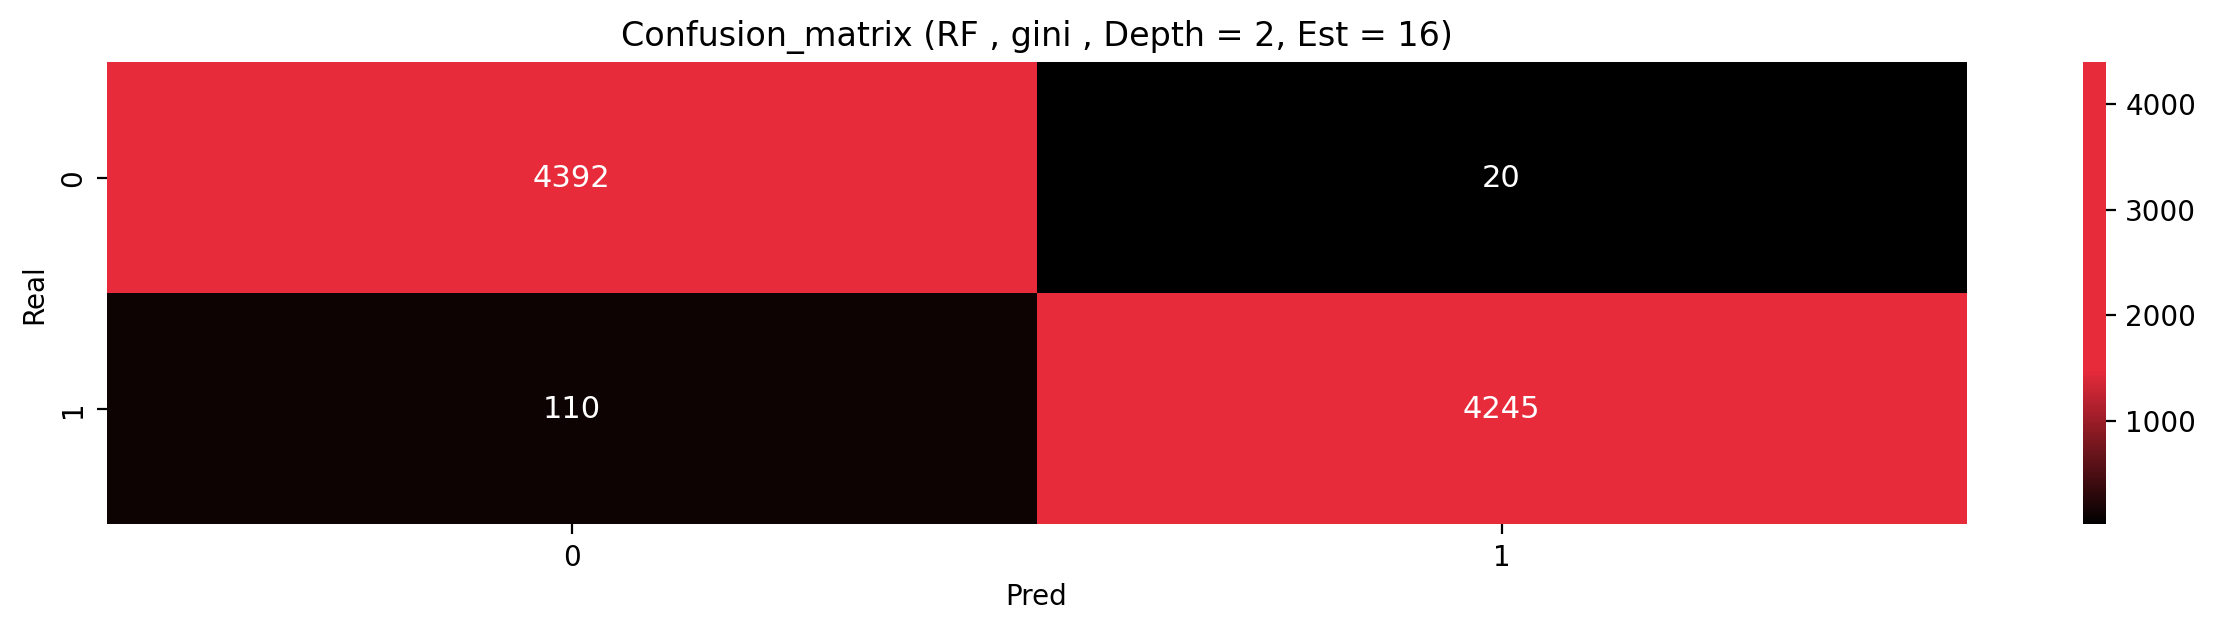

In [43]:
conf_matrix_7 = confusion_matrix(y_test, y_pred_7)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (RF , gini , Depth = 2, Est = 16)")
annot = np.array([[f"{conf_matrix_7[0, 0]}", f"{conf_matrix_7[0, 1]}"],
                  [f"{conf_matrix_7[1, 0]}", f"{conf_matrix_7[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_7,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [52]:
from xgboost import XGBClassifier
model6 = XGBClassifier(max_depth=5, criterion='gini', random_state=40, n_estimators=12)
model6.fit(X_train, y_train.ravel())
y_pred_6 = model6.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_6)
print("Accuracy:", accuracy)
Best_XGB = accuracy


Accuracy: 0.883198357476902


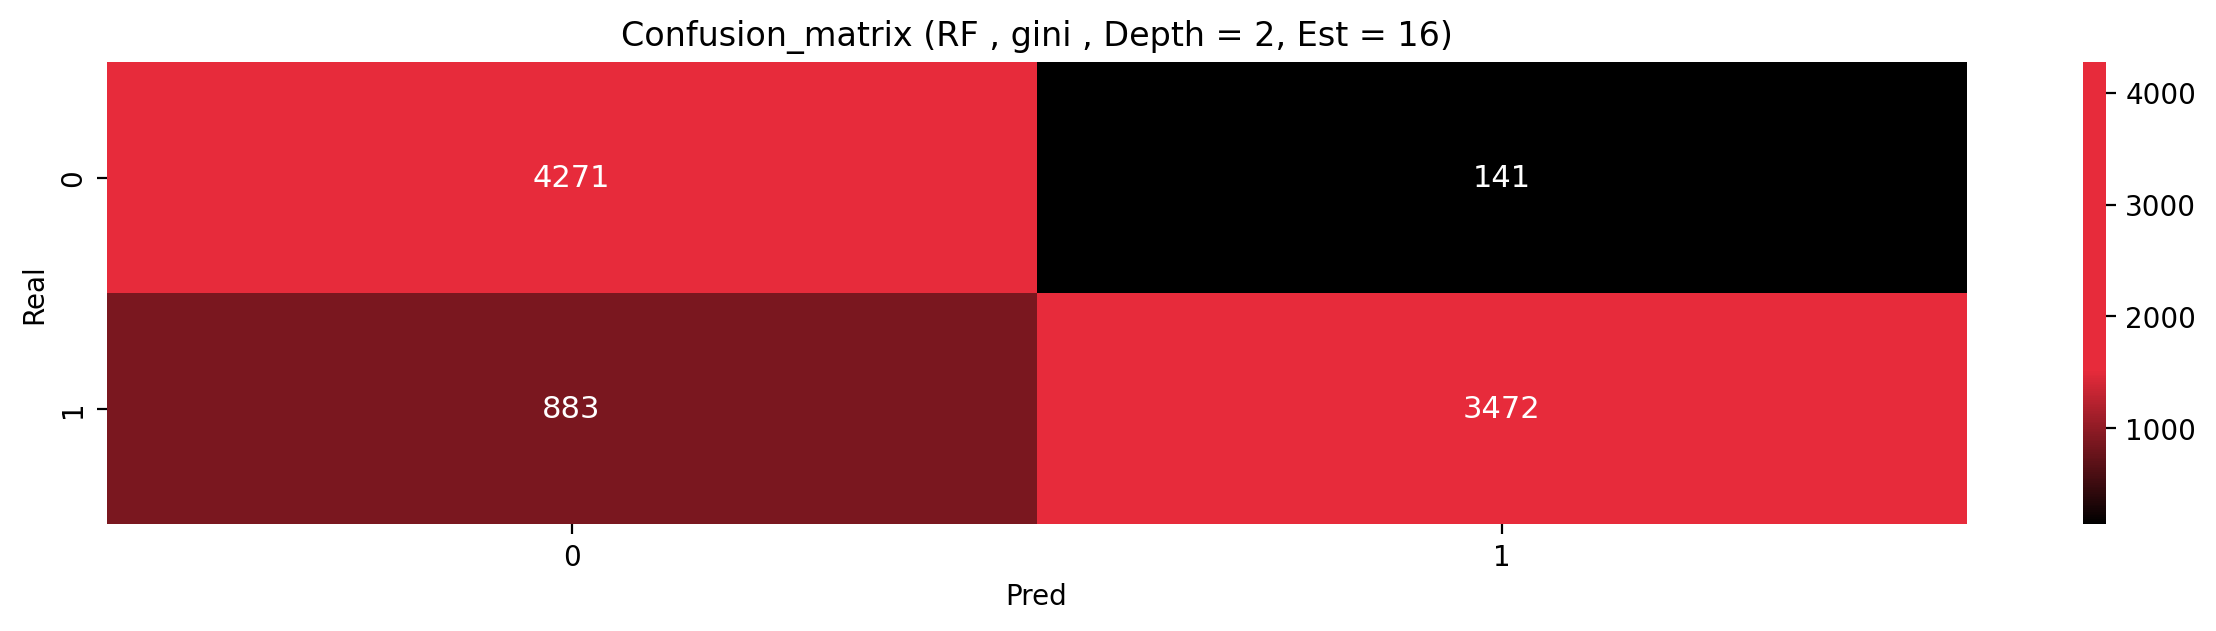

In [53]:
conf_matrix_6 = confusion_matrix(y_test, y_pred_6)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (RF , gini , Depth = 2, Est = 16)")
annot = np.array([[f"{conf_matrix_6[0, 0]}", f"{conf_matrix_6[0, 1]}"],
                  [f"{conf_matrix_6[1, 0]}", f"{conf_matrix_6[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_6,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [9]:
Best_models = pd.DataFrame({'Best_models_acc': [Best_XGB, Best_knn, Best_RF],
               'Best_models_name': ('XGBoost', 'KNN', 'Random Forest')})
Best_models.sort_values(by='Best_models_acc',ascending=False ,inplace = True)
Best_models

,Best_models_acc,Best_models_name
0,0.9875,Logistic
3,0.9875,Gausian Naive Bayes
1,0.6875,KNN
2,0.6500,SVM


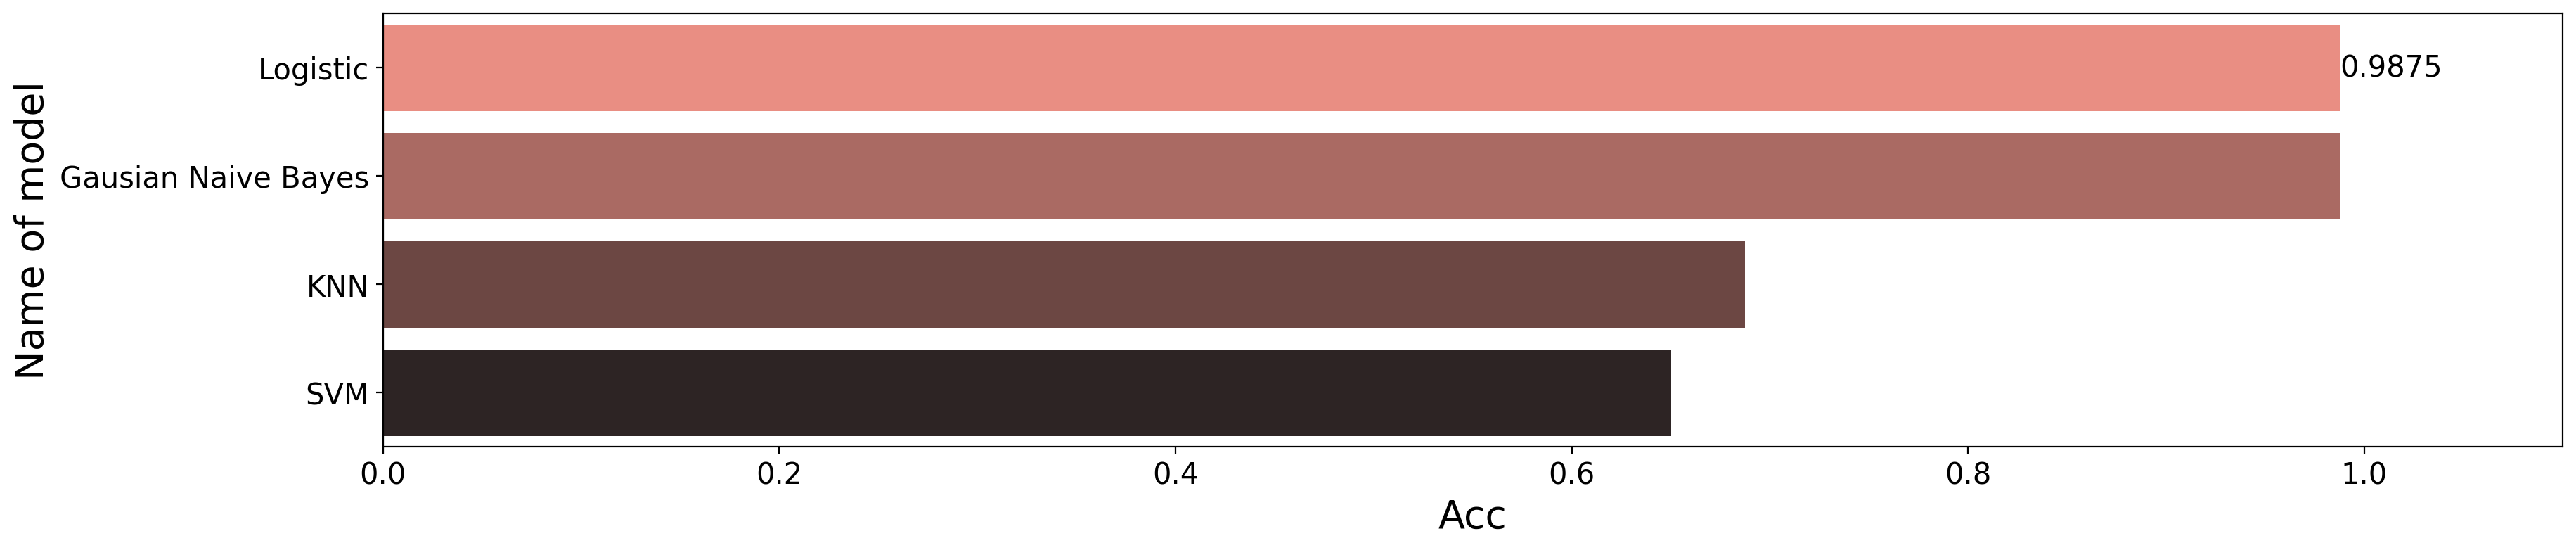

In [10]:



plt.figure(figsize=(20,4),dpi=200)
ax = sns.barplot(x= Best_models['Best_models_acc'], y= Best_models['Best_models_name'], palette="dark:salmon_r")
ax.bar_label(ax.containers[0],fontsize=15)
plt.xlabel("Acc",fontsize=20)
plt.ylabel("Name of model", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlim([0, 1.1])
plt.show()

In [60]:
import joblib
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
filepath = os.path.join(parent_directory, "pklfiles", "liver.pkl")

joblib.dump(model2,filepath)

['c:\\Users\\Divyansh Dev\\OneDrive\\Desktop\\medicare\\ml flask backend\\pklfiles\\liver.pkl']

In [59]:
X_test

,Age,Total_Bilirubin,Alkaline_Phosphotase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Merged_Feature
25243,1.745309,2.264182,-0.207607,-0.812979,-0.923806,-0.758312,False,True,1.402083
40352,0.368667,-0.423330,-0.519578,-0.351210,-0.167769,0.045004,False,True,-0.377893
33309,0.363475,-0.391713,0.091717,0.479974,0.336256,-0.140377,False,True,-0.308541
5716,-0.444804,-0.407521,-0.519578,-1.921224,-1.427831,-0.449345,False,True,-0.372524
37593,0.994413,-0.186197,0.091717,1.311158,1.218300,0.168591,False,True,-0.215019
...,...,...,...,...,...,...,...,...,...
41359,-0.716170,-0.423330,-0.532225,1.588220,0.084244,-1.067280,True,False,-0.399369
8381,1.307286,-0.407521,-0.688211,-0.074148,0.336256,0.477558,False,True,-0.359996
36371,-0.303083,-0.012299,-0.481635,1.034097,0.966287,0.168591,False,True,-0.126420
11517,-0.444804,-0.091343,1.609415,-1.644163,-1.931856,-1.376247,False,True,-0.096448
